# HW Week 3 Answers

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
weather = pd.read_csv('data/weather_2012.csv', parse_dates=True, index_col='Date/Time')

In [3]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
weather.tail()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [6]:
# A copy of the originals in case I mess up
original_columns = weather.columns
original_columns

Index(['Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [7]:
weather = weather.rename(columns={"Weather": "Desc"})

In [115]:
#Q1: Rename other columns to be shorter names that are easier to work with.

**NOTE: A lot of you did this with multiple lines. You can use a dictionary format here, with key:value pairs separated by colons!**

In [8]:
weather = weather.rename(columns={"Temp (C)": "Temp", "Dew Point Temp (C)": "Dew Point", "Rel Hum (%)": "Humidity", "Visibility (km)": "Visibility", "Stn Press (kPa)":"Pressure", "Wind Spd (km/h)": "Wind"})

In [10]:
# check it worked
weather.head()

,Temp,Dew Point,Humidity,Wind,Visibility,Pressure,Desc
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [21]:
#Q2 Plot the avg temperature by month.  (There are several ways to do this.)

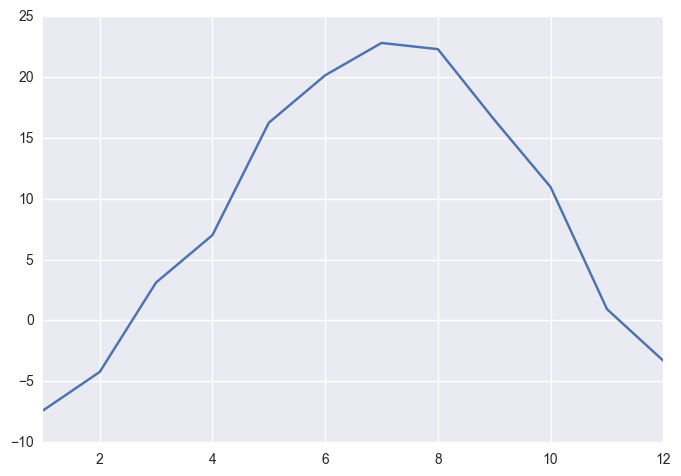

In [11]:
weather['Temp'].groupby(weather.index.month).mean().plot()

In [ ]:
# Q3: Find the date and then look up the row for the days with max and min temperatures. (Look back at the Timeseries NB for where I got the max and then looked up the date on the index.)

**NOTE: Your goal was to get the value of the index and use it to look up the row.  That can be done either by pasting the date into a .loc, or using the lookup directly inside the brackets for the .loc:**

In [26]:
weather['Temp'].idxmax()

Timestamp('2012-06-21 15:00:00')

In [28]:
weather.loc['2012-06-21 15:00:00']

Temp                         33
Dew Point                    19
Humidity                     44
Wind Spd (km/h)              24
Visibility                 24.1
Stn Press (kPa)           100.2
Desc               Mainly Clear
Name: 2012-06-21 15:00:00, dtype: object

In [30]:
weather.loc[weather['Temp'].idxmin()]

Temp                -23.3
Dew Point           -28.5
Humidity               62
Wind Spd (km/h)         7
Visibility           24.1
Stn Press (kPa)    102.45
Desc                Clear
Name: 2012-01-15 08:00:00, dtype: object

In [ ]:
# Q4: Resample to get the avg values per day.  Make this a new dataframe.

**NOTE: In class I forgot that I meant you to group all the minute/hours into 24 hour days, not group by day of the month. I didn't take off if you did it with day of the month, but it's silly, as someone pointed out to me when I said it wrong.**

**You can either use resample (I was trying to hint this) or groupby(weather.index.day).**

In [12]:
day = weather.resample("24H").mean()

In [13]:
day.head()

,Temp,Dew Point,Humidity,Wind,Visibility,Pressure
Date/Time,,,,,,
2012-01-01,0.629167,-1.450000,86.125000,12.666667,9.862500,100.543750
2012-01-02,0.041667,-6.200000,63.083333,31.416667,24.425000,99.479583
2012-01-03,-14.416667,-21.537500,54.791667,22.041667,24.120833,101.226250
2012-01-04,-13.645833,-19.250000,62.875000,10.500000,19.595833,101.253750
2012-01-05,-6.750000,-11.416667,70.000000,12.125000,24.362500,100.484583


In [16]:
# Most of you did groupby weather.index.day -- which is day of the month, 
# not the date.  We really want it combined into the full day of 24H.
alsoday = weather.groupby(weather.index.date).mean()
alsoday.head()

,Temp,Dew Point,Humidity,Wind,Visibility,Pressure
2012-01-01,0.629167,-1.450000,86.125000,12.666667,9.862500,100.543750
2012-01-02,0.041667,-6.200000,63.083333,31.416667,24.425000,99.479583
2012-01-03,-14.416667,-21.537500,54.791667,22.041667,24.120833,101.226250
2012-01-04,-13.645833,-19.250000,62.875000,10.500000,19.595833,101.253750
2012-01-05,-6.750000,-11.416667,70.000000,12.125000,24.362500,100.484583


In [ ]:
# Q5: Resample to get the median values per month. Make that a new dataframe.

**NOTE: Groupby is ok here too.**

In [42]:
# Notice it's median, not mean.
month = weather.resample("1M").median()

In [43]:
month

,Dew Point,Humidity,Pressure,Temp,Visibility,Wind
Date/Time,,,,,,
2012-01-31,-12.20,68.0,101.015,-7.05,24.1,17
2012-02-29,-8.80,69.0,101.140,-4.10,25.0,15
2012-03-31,-2.50,63.5,101.480,2.60,25.0,13
2012-04-30,-1.30,55.0,100.770,6.30,25.0,17
2012-05-31,8.60,63.0,101.210,16.05,25.0,11
2012-06-30,11.70,62.0,100.785,19.60,25.0,15
2012-07-31,14.95,62.5,100.835,22.90,25.0,11
2012-08-31,16.55,68.0,100.840,22.20,25.0,13
2012-09-30,10.20,73.0,101.150,16.10,25.0,13


In [47]:
# Q6: Plot the pressure using the original dataframe weather, and the day and month ones.

**NOTE: Line plots are better here, because it is timeseries. Also, bar charts take forever with the original data.**

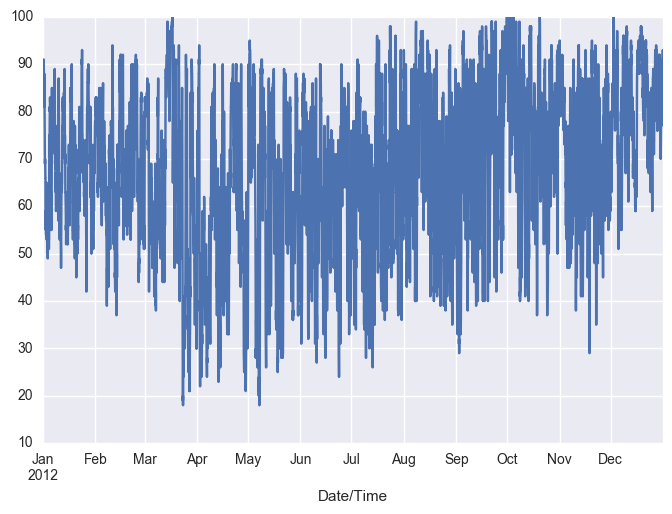

In [52]:
weather['Humidity'].plot()

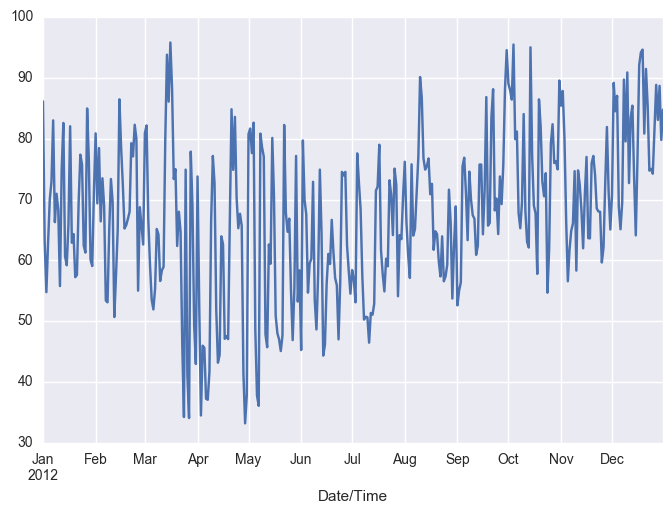

In [54]:
day['Humidity'].plot()

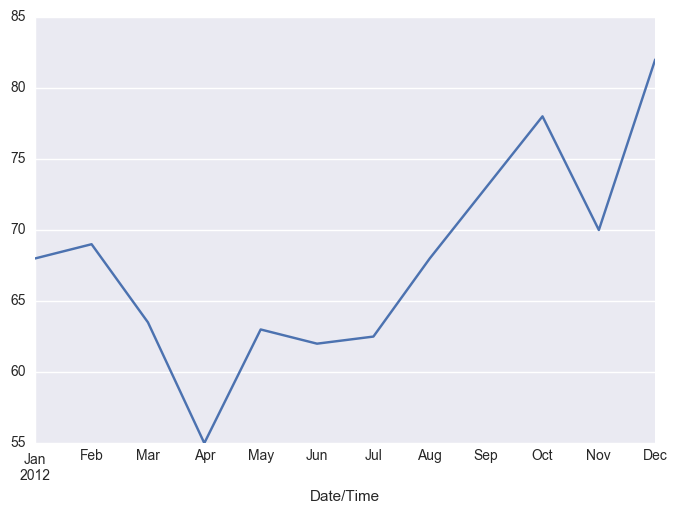

In [53]:
month['Humidity'].plot()

In [ ]:
# Q7: What is the weather description for the day with the wind speed is the highest?

In [62]:
weather.loc[weather['Wind'].idxmax()]['Desc']

'Mostly Cloudy'

In [ ]:
# Q8: What are the counts of the weather descriptions?

In [63]:
weather['Desc'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [ ]:
# Q9: find the rows that contain "Snow" and plot the temperature for those rows using a bar chart

**NOTE: Snow is in a lot of descriptions, not just "Snow".  You need to use "contains" for this one.  This is a bar chart because the days aren't all represented in this data -- summer has no snow, for example.**

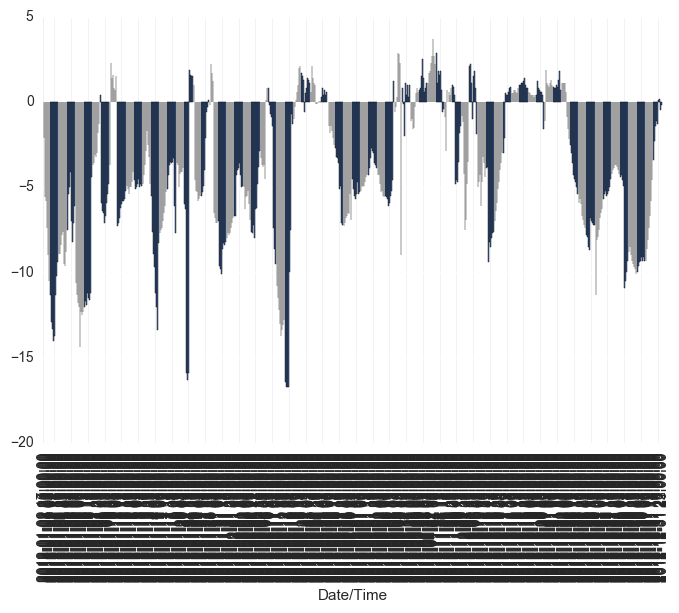

In [81]:
weather[weather['Desc'].str.contains("Snow")]['Temp'].plot(kind="bar")

In [ ]:
# Q10: Group by the weather description terms and use np.mean as your aggregate. Show the head.

In [119]:
weather.groupby(weather['Desc']).aggregate(np.mean).head()

,Temp,Dew Point,Humidity,Wind,Visibility,Pressure
Desc,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000


In [ ]:
# Q11: Sort the dataframe from Q10 by Temperature Ascending and 
# plot the top 5 Temperature values as a bar chart.

**NOTE: I said temp ascending, but for some reason most of you sorted ascending = False. It should be True, which is the default, which is why it's not shown. You do the sort, then you take the top 5 of the dataframe and plot those.**

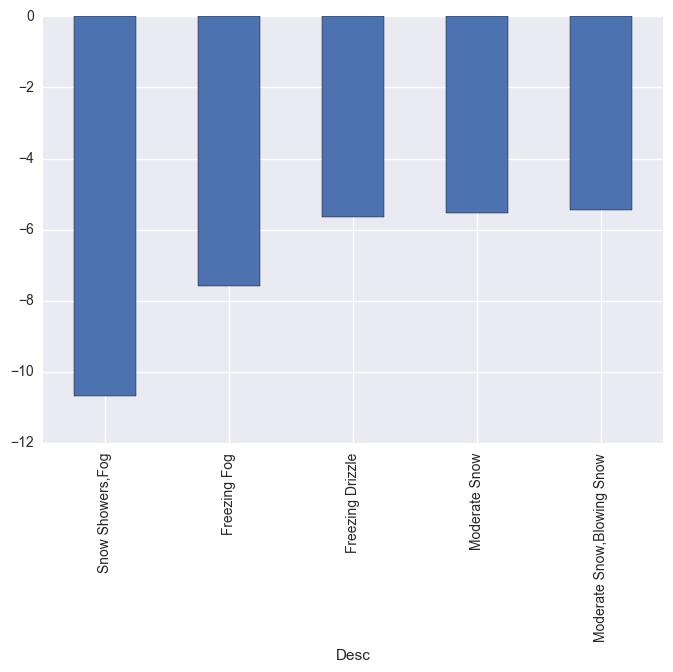

In [127]:
descmeans = weather.groupby(weather['Desc']).aggregate(np.mean)
descmeans.sort_values(by="Temp")['Temp'][0:5].plot(kind="bar")

In [ ]:
#Q12: Get a list of the unique weather terms that appear in the description column.

In [82]:
weather['Desc'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog', 'Thunderstorms,Moderate Rain Showers,Fog',
       'Rain Showers,Fog', 'Rain Showers,Snow Showers', 'Snow Pellets',
       'Rain,Snow,Fog', 'Moderate Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Drizzle,Ice Pellets,Fog',
       'Drizzle,Snow', 'Rain,Ice Pellets', 'Drizzle,Snow,Fog',
       

In [84]:
# Q13: Split the Description elements by comma (but don't make multiple columns for them).

In [86]:
lists = weather['Desc'].str.split(",")

In [110]:
# Q12: Get the values from the split descriptions you just got (hint: values) and figure out 
# how to make a Counter object to see which ones occur most often. Call most_common on the 
# Counter.
# Another hint: flatten a list of lists by using this magic spell that I look up every time:
# [item for sublist in nested_list for item in sublist]
# in other words, if nested_list is [[2,3], [32,55], [4]], then
# the flat version will be [2,3,32,55,4]

**NOTE: You should be familiar with Counter from the Bootcamp or from looking it up if you did not take the Bootcamp because you already knew some Python.  It was also used in week 1, I believe.**

In [107]:
weather_desc = list(lists.values)

In [108]:
flat_list = [item for sublist in weather_desc for item in sublist]

In [109]:
flat_list

['Fog',
 'Fog',
 'Freezing Drizzle',
 'Fog',
 'Freezing Drizzle',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Fog',
 'Mostly Cloudy',
 'Cloudy',
 'Rain',
 'Rain',
 'Cloudy',
 'Cloudy',
 'Rain Showers',
 'Cloudy',
 'Rain Showers',
 'Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mainly Clear',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Snow Showers',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Snow Showers',
 'Snow Showers',
 'Cloudy',
 'Snow Showers',
 'Snow Showers',
 'Cloudy',
 'Snow Showers',
 'Snow Showers',
 'Cloudy',
 'Snow Showers',
 'Snow Showers',
 'Snow',
 'Mostly Cloudy',
 'Mostly Cloudy',
 'Cloudy',
 'Mostly Cloudy',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Mainly Clear',
 'Clear',
 'Mainly Cl

In [112]:
from collections import Counter

In [113]:
counts = Counter(flat_list)

In [114]:
counts.most_common()

[('Mainly Clear', 2106),
 ('Mostly Cloudy', 2069),
 ('Cloudy', 1728),
 ('Clear', 1326),
 ('Snow', 508),
 ('Rain', 454),
 ('Fog', 422),
 ('Rain Showers', 210),
 ('Drizzle', 139),
 ('Snow Showers', 66),
 ('Haze', 29),
 ('Thunderstorms', 27),
 ('Freezing Drizzle', 27),
 ('Freezing Rain', 22),
 ('Blowing Snow', 21),
 ('Ice Pellets', 13),
 ('Moderate Snow', 6),
 ('Freezing Fog', 4),
 ('Snow Grains', 2),
 ('Snow Pellets', 1),
 ('Heavy Rain Showers', 1),
 ('Moderate Rain', 1),
 ('Moderate Rain Showers', 1)]